In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

In [4]:
np.random.seed(0)

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
# see the shapes of our data imported from MNIST dataset.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [7]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

In [8]:
num_of_samples = []

In [9]:
cols = 5
num_classes = 10

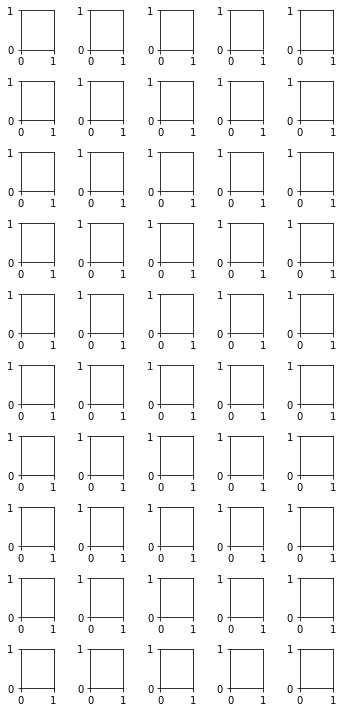

In [10]:
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 10))
fig.tight_layout()  # To avoid overlapping of plots

In [11]:
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off") # To remove axis
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

No.of Samples: [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

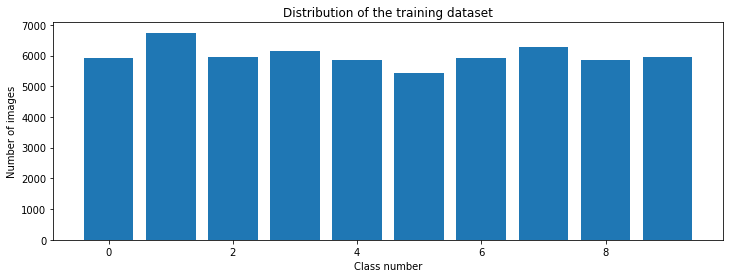

In [12]:
# shows the no.of images belonging to each class
print("No.of Samples:", num_of_samples)
# Lets visualize this with bar plots
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [13]:
# (labels to encode, total no.of classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
X_train = X_train/255 
X_test = X_test/255

In [15]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print("training data", X_train.shape)
print("testing data", X_test.shape)

training data (60000, 784)
testing data (10000, 784)


In [16]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 30, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/30
270/270 [==============================] - 2s 3ms/step - loss: 0.5658 - accuracy: 0.8169 - val_loss: 0.2609 - val_accuracy: 0.9233
Epoch 2/30
270/270 [==============================] - 1s 3ms/step - loss: 0.2843 - accuracy: 0.9160 - val_loss: 0.2338 - val_accuracy: 0.9330
Epoch 3/30
270/270 [==============================] - 1s 2ms/step - loss: 0.2480 - accuracy: 0.9278 - val_loss: 0.2144 - val_accuracy: 0.9405
Epoch 4/30
270/270 [==============================] - 1s 3ms/step - loss: 0.2264 - accuracy: 0.9319 - val_loss: 0.2057 - val_accuracy: 0.9417
Epoch 5/30
270/270 [==============================] - 1s 3ms/step - loss: 0.2115 - accuracy: 0.9378 - val_loss: 0.1948 - val_accuracy: 0.9472
Epoch 6/30
270/270 [==============================] - 1s 3ms/step - loss: 0.2015 - accuracy: 0.9403 - val_loss: 0.1920 - val_accuracy: 0.9465
Epoch 7/30
270/270 [==============================] - 1s 3ms/step - loss: 0.1929 - accuracy: 0.9423 - val_loss: 0.1942 - val_accuracy: 0.9417
Epoch 

Text(0.5, 0, 'epoch')

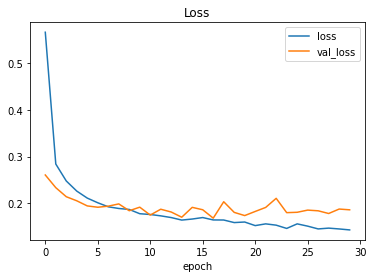

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

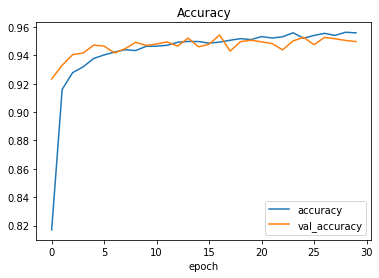

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')   

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.2225918024778366
Test accuracy: 0.9391999840736389


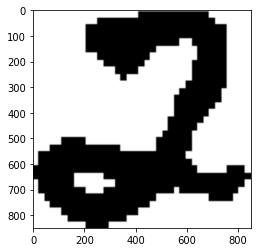

In [21]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

resized image shape: (28, 28, 4)
Grayscale image shape: (28, 28)


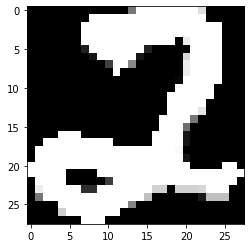

In [22]:
import cv2
array_img = np.asarray(img)
resized_img = cv2.resize(array_img, (28, 28))
print("resized image shape:", resized_img.shape)
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
print("Grayscale image shape:", gray_img.shape)
image = cv2.bitwise_not(gray_img)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [23]:
image = image/255
image = image.reshape(1, 784)
prediction = np.argmax(model.predict(image), axis=-1)
print("predicted digit:", str(prediction))

predicted digit: [2]
